In [1]:
import os
car_list = []
for file in os.listdir("./"):
    if ("ipynb" not in file) and ("png" not in file):
        car_list.append(file)
print(car_list)

['1005ca47e516495512da0dbf3c68e847', '100715345ee54d7ae38b52b4ee9d36a3', '100c3076c74ee1874eb766e5a46fceab', '10247b51a42b41603ffe0e5069bf1eb5', '103402871ed03ed117a54d13fb550a39', '103d6951a3ed3c0a203f35d9b3b48203', '10467a4688676755ba6206304e8ff98f', '1047f2879c7fdcb5709a6634bf501a9e', '10555502fa7b3027283ffcfc40c29975', '105a77e198fd243eab07f3d736b6f705', '105dedf1b70c2826b2dcc642c86ae8f4', '10716a366de708b8fac96522b26f7fd', '107699ca67fcdf3fea999fe4ffdc2504', '1079efee042629d4ce28f0f1b509eda', '107a17c6f2dd9c488924120dfad0e290', '107f6597656d6f1be26620e076ee4a1d', '1084519e6ff38c464eb597c502281e0a', '1089cbe82dc0e72133d7c9e122eec9b6', '109567d7d55b8fe515a520abec2f04dd', '1096a3284751db563494893564e07d4a', '1099749578e77afbed555d37dae96920', '10a083a99a7f3500c646fcd7b8b50a71', '10a2f8b85837b0792db5437b4a62726e', '10a6599c4f5675cf6ca2b6e5474aad11', '10ac370849c734383cbe6906419763e9', '10b59082091513b3e66cabd11ba41eae', '10b9d59466522a5963b803b494079757', '10c19d45fed88e6984c322bbb3fe

In [2]:
from sklearn.manifold import TSNE
import pickle
embedding = []

for car in car_list:
    #print(car)
    with open("./" + car, "rb") as f:
        car_embedding = pickle.load(f)
        embedding.append(car_embedding)

In [3]:
from sklearn.manifold import TSNE
import numpy as np

arr = np.array(embedding).reshape([-1, 512 * 8 * 8])
print(arr.shape)

tsne_embedded = TSNE(n_components=2).fit_transform(arr)

(1536, 32768)


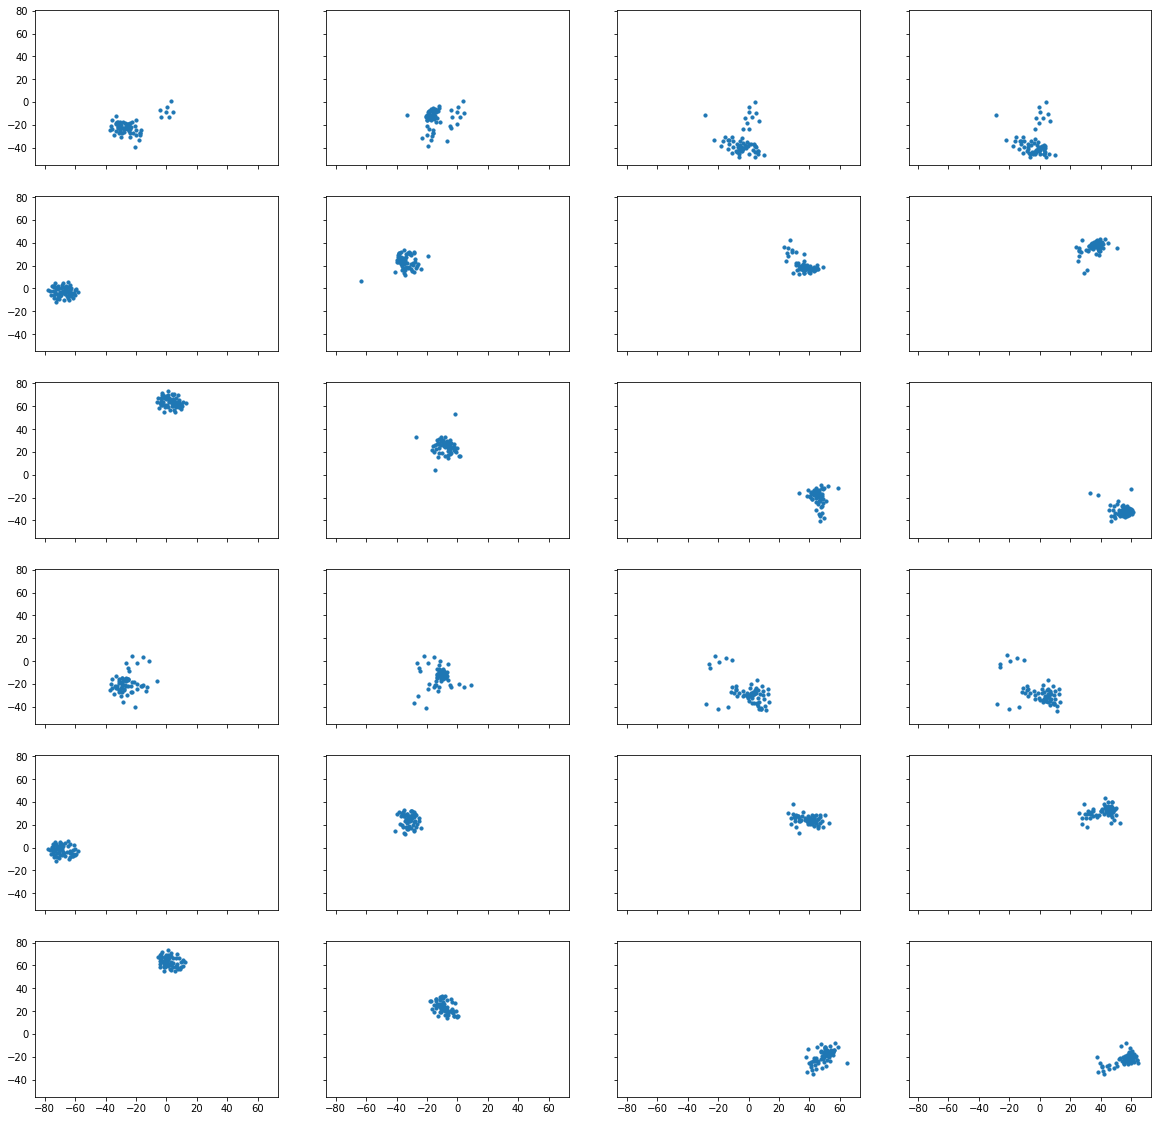

In [18]:
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 20, 20
tsne_vp = np.array(tsne_embedded).reshape([-1, 24, 2])
az_list = [60 * i for i in range(6)]
el_list = [-30, 0, 30, 60]
vp_idx = 0
az_idx = 0
fig, axs = plt.subplots(6, 4, sharex=True, sharey=True)
for az in az_list:
    el_idx = 0
    for el in el_list:
        tmp = tsne_vp[:, vp_idx, :].reshape([-1, 2])
        axs[az_idx, el_idx].scatter(tmp[:, 0], tmp[:, 1], s=10)
        vp_idx += 1
        el_idx += 1
    az_idx += 1
fig.savefig("vp_manifold")
plt.show()

(1536, 2)


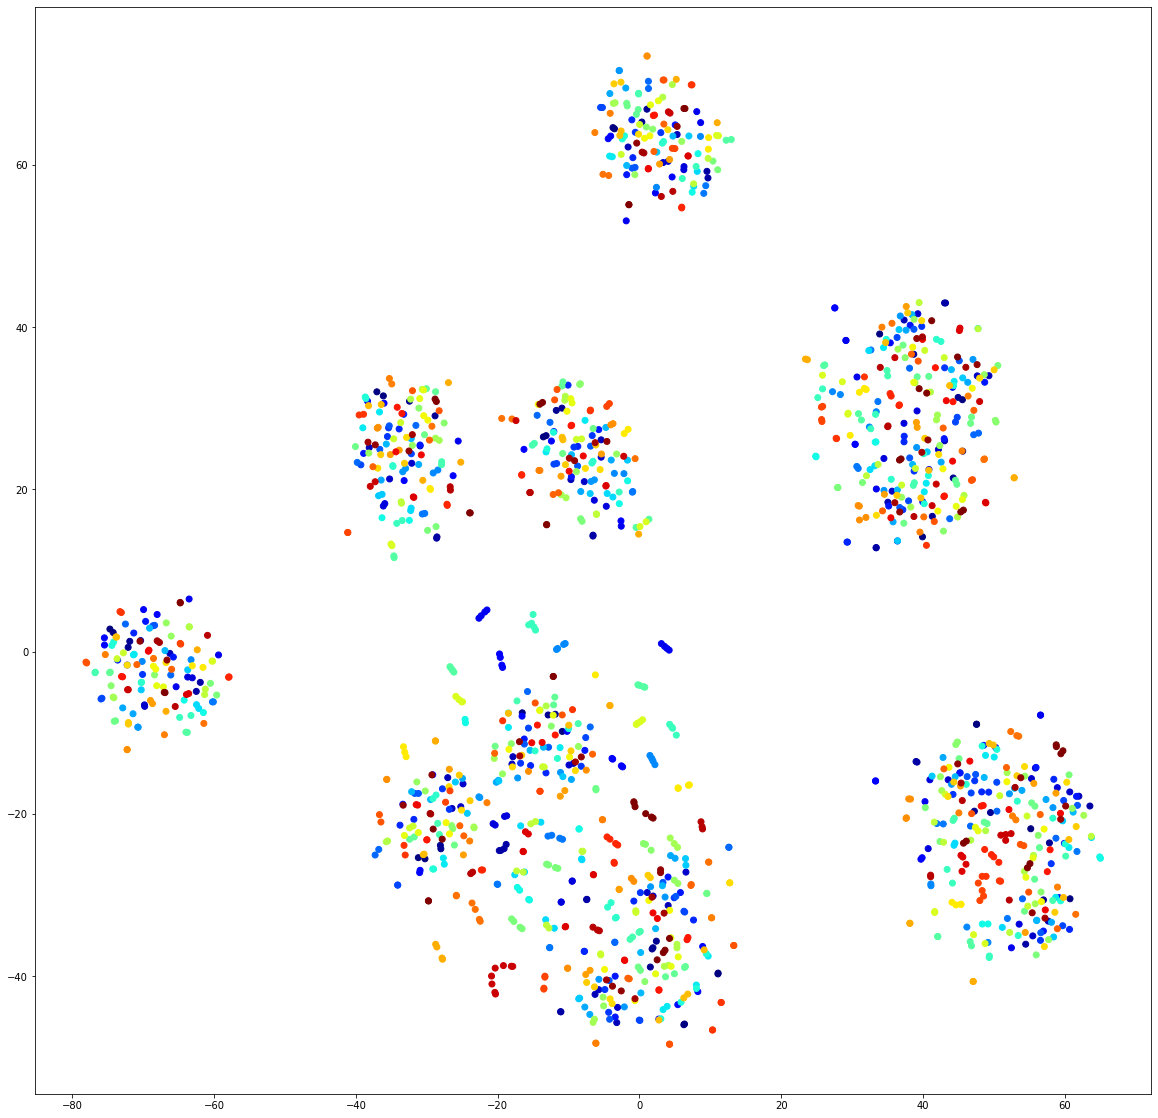

In [19]:
import matplotlib.pyplot as plt
import matplotlib as mpl

print(tsne_embedded.shape)

tag = []
N = 1536
for i in range(64):
    tag += [i] * 24
    
tag = np.array(tag)

# define the colormap
cmap = plt.get_cmap('jet', 63)
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]
# create the new map
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)

# define the bins and normalize

plt.scatter(tsne_embedded[:, 0], tsne_embedded[:, 1],c=tag ,cmap=cmap)
'''
c = ["red"] * 24 + ["green"] * 24 + ["blue"] * 24 + ["yellow"] * 24

plt.scatter(tsne_embedded[:, 0], tsne_embedded[:, 1], color=c)
'''
plt.savefig("ResNet18_reid")

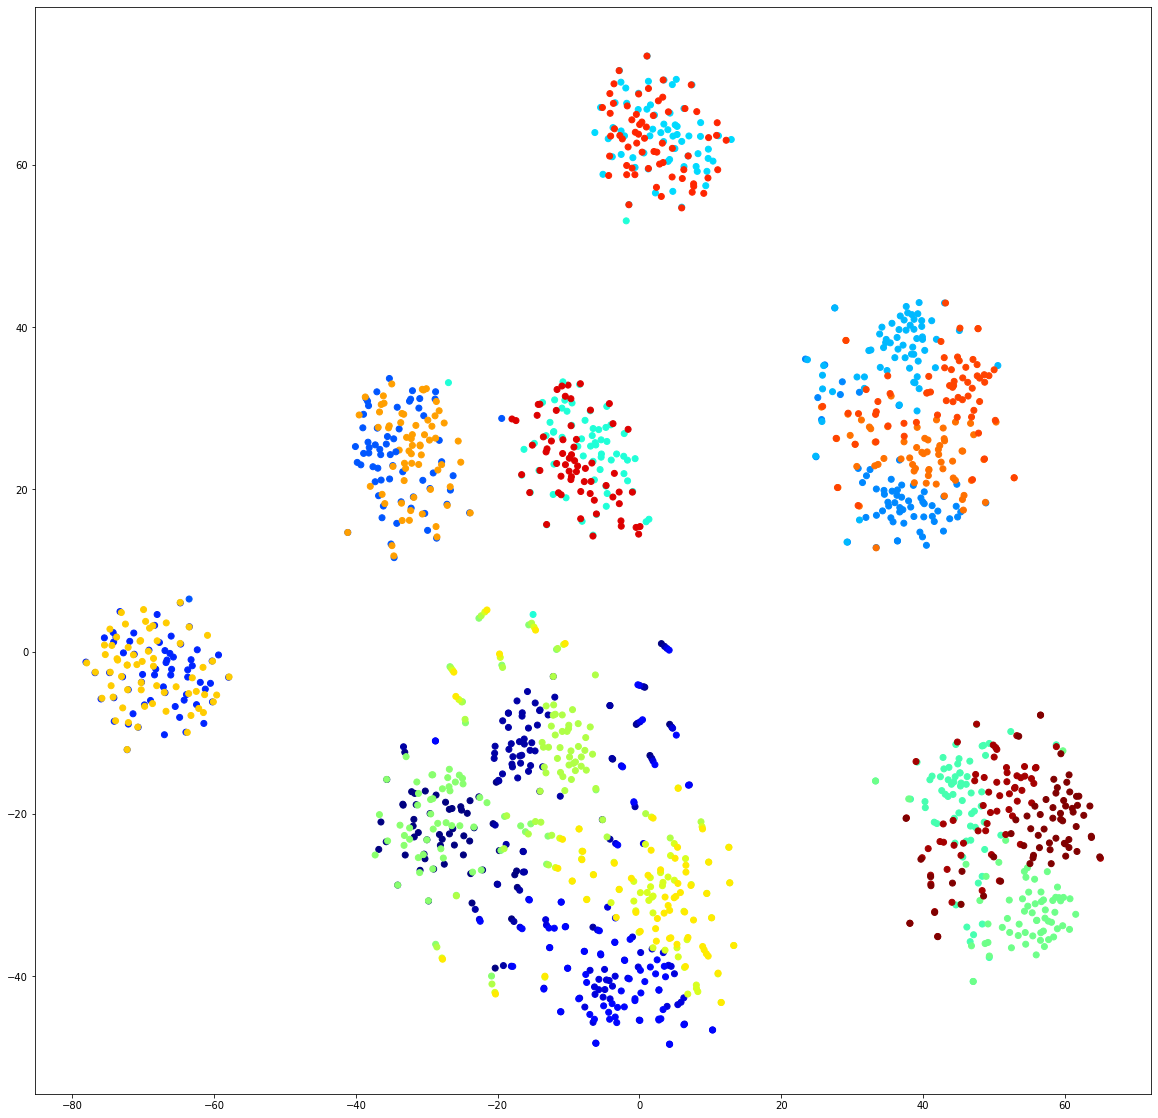

In [20]:
tag = []

for i in range(64):
    tag += [vp for vp in range(24)]

plt.scatter(tsne_embedded[:, 0], tsne_embedded[:, 1],c=tag ,cmap=cmap)
plt.savefig("ResNet18_vp")